In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra

import pandas as pd # processamento de dados, CSV I/O 

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import Image
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns

import missingno as msno #to visualize missing data

from imblearn.over_sampling import SMOTE
import itertools


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,roc_curve
#plot_confusion_matrix,plot_roc_curve,
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder #label encoding for categorical columns

pyo.init_notebook_mode()

# 3. Processamento/Tratamento de Dados

O processamento e o tratamento dos dados foram feitos utilizando a linguagem Python, versão 3.7.0, no ambiente Jupyter Notebook, versão 5.6.0. Dentro da linguagem, utilizou-se a biblioteca “pandas” que é uma poderosa ferramenta para tratamento e análise de dados.

Em seguida, deve-se fazer a leitura e tratamento dos datasets, que, nesse caso, será feita individualmente para cada um deles

In [2]:

cliente = pd.read_csv("application_record.csv", encoding = 'utf-8') # é o arquivo que contém informações sobre todos os clientes quanto à sua situação socioeconômica 
transacao = pd.read_csv("credit_record.csv", encoding = 'utf-8')    #é o arquivo que contém todos os registros de pagamento/inadimplência de um determinado cliente


Para se obter informações do dataframe, pode-se utilizar a função “info()” que, no caso específico, mostrou que o dataframe possui 438557 entradas, divididas nas 18 colunas apresentadas anteriormente. falar tambem do outro dataframe

In [3]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
transacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Interessante perceber que uma informação potencialmente útil para o estudo não foi considerada, a informação da coluna FLAG_MOBIL.
Isso se deu pelo fato de que essa coluna é uma constante e por isso foi desconsiderada.


In [5]:
cliente.nunique()


ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [6]:
transacao.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [7]:
cliente.drop('FLAG_MOBIL', axis=1, inplace=True)


In [8]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 15  OCCUPATION_TYPE  

Percebe-se que agora há apenas as 16 colunas escolhidas, mas ainda com as 438557 entradas filtradas anteriormente

Para verificar se há dados nulos no dataframe, utilizou-se a função “isnull()”, que faz essa análise, em conjunto com a função “sum()”, que, nesse caso, soma os valores encontrados na função anterior.

In [9]:
cliente.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [10]:
transacao.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Após esse comando, verificou-se que o dataframe cliente, apresenta dados nulos na coluna OCCUPATION_TYPE que necessitam de tratamento. Nesse caso, os dados nulos serão substituídos pelo valor 'Other'.

In [11]:
cliente['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

In [12]:
cliente.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

O número de clientes distintos não pode ser menor que o tamanho do dataframe application_record.csv, e cada linha deve corresponder a um cliente único. A verificação de dados duplicados foi confirmada pelos método duplicated.


In [13]:
print("Número de linhas no dataset application_record.csv: {}".format(len(cliente)))
print("Número de clientes distintos no dataset application_record.csv : {}".format(len(cliente.ID.unique())))


Número de linhas no dataset application_record.csv: 438557
Número de clientes distintos no dataset application_record.csv : 438510


In [14]:
print(f'Número de linhas duplicadas no dataset application_record.csv: {cliente.iloc[:,1:].duplicated().sum()}, ({np.round(100*cliente.iloc[:,1:].duplicated().sum()/len(cliente),1)}%)')
print('')
print(f'Número de linhas duplicadas no dataset credit_record.csv: {transacao.duplicated().sum()}, ({np.round(100*transacao.duplicated().sum()/len(transacao),1)}%)')

Número de linhas duplicadas no dataset application_record.csv: 348472, (79.5%)

Número de linhas duplicadas no dataset credit_record.csv: 0, (0.0%)


Para remoção dos registros duplicados foi utilizado o método “drop_duplicates”.

In [15]:
cliente=cliente.drop_duplicates(subset=cliente.columns[1:], keep='first')

In [16]:
print(f'Número de linhas duplicadas no dataset application_record.csv: {cliente.iloc[:,1:].duplicated().sum()}, ({np.round(100*cliente.iloc[:,1:].duplicated().sum()/len(cliente),1)}%)')


Número de linhas duplicadas no dataset application_record.csv: 0, (0.0%)


Para modelos de machine learning supervisionados é fundamental a etapa de criação de uma coluna target no dataset. Em problemas que isso é possível, faz com que os modelos e resultados obtidos possam ser explorados com maior facilidade. 

O caso em análise busca avaliar a previsibilidade se um candidato é um cliente 'bom' ou 'ruim' com base em alguns parâmetros. Dessa forma, a informação que utilizaremos como resultado é a coluna STATUS, que traz os dias em atraso no pagamento.

0: 1 a 29 dias de atraso 1: 30 a 59 dias de atraso 2: 60 a 89 dias de atraso 3: 90 a 119 dias de atraso 4: 120 a 149 dias de atraso 5: Mais de 150 dias de atraso ou dívidas inadimplentes, baixa C : Quitados no mês X: Não há empréstimos durante o mês

As linhas que possuem target=1 representam os clientes que estão com no mínimo um mês de atraso, e será considerado um cliente "ruim". 

In [17]:
transacao.STATUS.unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [18]:

transacao['target']=transacao['STATUS']
transacao['target'].replace('X', 0, inplace=True)
transacao['target'].replace('C', 0, inplace=True)
transacao['target']=transacao['target'].astype(int)
transacao.loc[transacao['target']>=1,'target']=1


Integração (merge/join) dos datasets. 
O objetivo agora é criar um único dataset consolidado, gerado a partir da integração (join/merge) dos datasets gerados.
Para isso, foi necessário agrupar o dataset transacao, por meio de seu ID de cliente, através dos comandos “groupby” e “agg(max)” que, em conjunto, selecionam o valor máximo de target para cada cliente.

In [19]:
transacao_df=pd.DataFrame(transacao.groupby(['ID'])['target'].agg(max)).reset_index()

In [20]:
transacao_df.head()

ID  target
0  5001711       0
1  5001712       0
2  5001713       0
3  5001714       0
4  5001715       0

In [21]:
# Merge dataframes
new_df=pd.merge(cliente, transacao_df, how='inner', on=['ID'])

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9709 non-null   int64  
 1   CODE_GENDER          9709 non-null   object 
 2   FLAG_OWN_CAR         9709 non-null   object 
 3   FLAG_OWN_REALTY      9709 non-null   object 
 4   CNT_CHILDREN         9709 non-null   int64  
 5   AMT_INCOME_TOTAL     9709 non-null   float64
 6   NAME_INCOME_TYPE     9709 non-null   object 
 7   NAME_EDUCATION_TYPE  9709 non-null   object 
 8   NAME_FAMILY_STATUS   9709 non-null   object 
 9   NAME_HOUSING_TYPE    9709 non-null   object 
 10  DAYS_BIRTH           9709 non-null   int64  
 11  DAYS_EMPLOYED        9709 non-null   int64  
 12  FLAG_WORK_PHONE      9709 non-null   int64  
 13  FLAG_PHONE           9709 non-null   int64  
 14  FLAG_EMAIL           9709 non-null   int64  
 15  OCCUPATION_TYPE      9709 non-null   o

Faz sentido que o número de meses em que a conta está aberta, seja correlacionado com o risco do cliente (uma vez que há mais oportunidades de perder pagamentos).

In [23]:
# Meses em que a conta está aberta
inicio_df=pd.DataFrame(transacao.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

# Renomear a coluna
inicio_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Meses como número positivo
inicio_df['ACCOUNT_LENGTH']=-inicio_df['ACCOUNT_LENGTH']

# Merge dataframes 
new_df=pd.merge(new_df, inicio_df, how='inner', on=['ID'])

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9709 non-null   int64  
 1   CODE_GENDER          9709 non-null   object 
 2   FLAG_OWN_CAR         9709 non-null   object 
 3   FLAG_OWN_REALTY      9709 non-null   object 
 4   CNT_CHILDREN         9709 non-null   int64  
 5   AMT_INCOME_TOTAL     9709 non-null   float64
 6   NAME_INCOME_TYPE     9709 non-null   object 
 7   NAME_EDUCATION_TYPE  9709 non-null   object 
 8   NAME_FAMILY_STATUS   9709 non-null   object 
 9   NAME_HOUSING_TYPE    9709 non-null   object 
 10  DAYS_BIRTH           9709 non-null   int64  
 11  DAYS_EMPLOYED        9709 non-null   int64  
 12  FLAG_WORK_PHONE      9709 non-null   int64  
 13  FLAG_PHONE           9709 non-null   int64  
 14  FLAG_EMAIL           9709 non-null   int64  
 15  OCCUPATION_TYPE      9709 non-null   o

In [24]:
# Criar a variável idade
new_df['AGE_YEARS']=-new_df['DAYS_BIRTH']/365.2425
new_df.drop('DAYS_BIRTH', axis=1, inplace=True)

# Criar um indicador se está empregado ou não
new_df['EMPLOYED']='S'
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'EMPLOYED']='N'

# Criar a variável anos em que está empregado
new_df['YEARS_EMPLOYED']=-new_df['DAYS_EMPLOYED']/365.2425
new_df.loc[new_df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
new_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [25]:
new_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008806           M            Y               Y             0   
2  5008808           F            N               Y             0   
3  5008812           F            N               Y             0   
4  5008815           M            Y               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          112500.0               Working  Secondary / secondary special   
2          270000.0  Commercial associate  Secondary / secondary special   
3          283500.0             Pensioner               Higher education   
4          270000.0               Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_WORK_PHONE  FLAG_PHONE  \
0        Civil marriage   Rented apartment                1           0   
1               Married  House / apartment                0           0   
2  Single / not married  House / apartment                0           1   
3             Separated  House / apartment                0           0   
4               Married  House / apartment                1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  target  ACCOUNT_LENGTH  \
0           0           Other              2.0       1              15   
1           0  Security staff              2.0       0              29   
2           1     Sales staff              1.0       0               4   
3           0           Other              1.0       0              20   
4           1     Accountants              2.0       0               5   

   AGE_YEARS EMPLOYED  YEARS_EMPLOYED  
0  32.868574        S       12.435574  
1  58.793815        S        3.104787  
2  52.321403        S        8.353354  
3  61.504343        N        0.000000  
4  46.193967        S        2.105450

Renomear as colunas


In [26]:
new_df = new_df.rename(columns={'CODE_GENDER': 'COD_SEXO', 'FLAG_OWN_CAR': 'COD_TEM_CARRO', 
                               'FLAG_OWN_REALTY':'COD_TEM_IMOVEL','CNT_CHILDREN':'NUM_FILHOS',
                               'AMT_INCOME_TOTAL':'RENDA','NAME_INCOME_TYPE':'TIPO_RENDA',
                               'NAME_EDUCATION_TYPE':'NIVEL_ESCOLARIDADE','NAME_FAMILY_STATUS':'ESTADO_CIVIL',
                               'NAME_HOUSING_TYPE':'TIPO_MORADIA','FLAG_WORK_PHONE':'COD_TEL_TRABALHO',
                               'FLAG_PHONE':'COD_TEM_TELEFONE','FLAG_EMAIL':'COD_TEM_EMAIL','OCCUPATION_TYPE':'PROFISSAO',
                               'CNT_FAM_MEMBERS':'NUM_MEMBROS_FAMILIA','target':'RESULTADO','ACCOUNT_LENGTH':'TEMPO_DA_CONTA',
                                'AGE_YEARS':'IDADE','EMPLOYED':'COD_TEM_EMPREGO','YEARS_EMPLOYED':'ANOS_EMPREGADO'})

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9709 non-null   int64  
 1   COD_SEXO             9709 non-null   object 
 2   COD_TEM_CARRO        9709 non-null   object 
 3   COD_TEM_IMOVEL       9709 non-null   object 
 4   NUM_FILHOS           9709 non-null   int64  
 5   RENDA                9709 non-null   float64
 6   TIPO_RENDA           9709 non-null   object 
 7   NIVEL_ESCOLARIDADE   9709 non-null   object 
 8   ESTADO_CIVIL         9709 non-null   object 
 9   TIPO_MORADIA         9709 non-null   object 
 10  COD_TEL_TRABALHO     9709 non-null   int64  
 11  COD_TEM_TELEFONE     9709 non-null   int64  
 12  COD_TEM_EMAIL        9709 non-null   int64  
 13  PROFISSAO            9709 non-null   object 
 14  NUM_MEMBROS_FAMILIA  9709 non-null   float64
 15  RESULTADO            9709 non-null   i

In [28]:
new_df.head()

ID COD_SEXO COD_TEM_CARRO COD_TEM_IMOVEL  NUM_FILHOS     RENDA  \
0  5008804        M             Y              Y           0  427500.0   
1  5008806        M             Y              Y           0  112500.0   
2  5008808        F             N              Y           0  270000.0   
3  5008812        F             N              Y           0  283500.0   
4  5008815        M             Y              Y           0  270000.0   

             TIPO_RENDA             NIVEL_ESCOLARIDADE          ESTADO_CIVIL  \
0               Working               Higher education        Civil marriage   
1               Working  Secondary / secondary special               Married   
2  Commercial associate  Secondary / secondary special  Single / not married   
3             Pensioner               Higher education             Separated   
4               Working               Higher education               Married   

        TIPO_MORADIA  COD_TEL_TRABALHO  COD_TEM_TELEFONE  COD_TEM_EMAIL  \
0   Rented apartment                 1                 0              0   
1  House / apartment                 0                 0              0   
2  House / apartment                 0                 1              1   
3  House / apartment                 0                 0              0   
4  House / apartment                 1                 1              1   

        PROFISSAO  NUM_MEMBROS_FAMILIA  RESULTADO  TEMPO_DA_CONTA      IDADE  \
0           Other                  2.0          1              15  32.868574   
1  Security staff                  2.0          0              29  58.793815   
2     Sales staff                  1.0          0               4  52.321403   
3           Other                  1.0          0              20  61.504343   
4     Accountants                  2.0          0               5  46.193967   

  COD_TEM_EMPREGO  ANOS_EMPREGADO  
0               S       12.435574  
1               S        3.104787  
2               S        8.353354  
3               N        0.000000  
4               S        2.105450

In [29]:
#new_df.dtypes

Vamos transformar os valores de algumas colunas para português 

In [30]:
print(new_df['PROFISSAO'].unique())

['Other' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drivers' 'Core staff' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty agents' 'IT staff']


In [31]:
print(new_df['TIPO_RENDA'].unique())

['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']


In [32]:
print(new_df['TIPO_MORADIA'].unique())

['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


In [33]:
print(new_df['NIVEL_ESCOLARIDADE'].unique())

['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [34]:
print(new_df['ESTADO_CIVIL'].unique())

['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']


In [35]:
new_df['COD_SEXO'] = new_df['COD_SEXO'].replace(['M'], 'H')
new_df['COD_SEXO'] = new_df['COD_SEXO'].replace(['F'], 'M')

new_df['COD_TEM_CARRO'] = new_df['COD_TEM_CARRO'].replace(['Y'], 'S')
new_df['COD_TEM_IMOVEL'] = new_df['COD_TEM_IMOVEL'].replace(['Y'], 'S')


new_df['TIPO_RENDA'] = new_df['TIPO_RENDA'].replace(['Commercial associate'], 'Sócio Comercial')
new_df['TIPO_RENDA'] = new_df['TIPO_RENDA'].replace(['Working'], 'Trabalhador da Área Privada')
new_df['TIPO_RENDA'] = new_df['TIPO_RENDA'].replace(['Pensioner'], 'Pensionista')
new_df['TIPO_RENDA'] = new_df['TIPO_RENDA'].replace(['State servant'], 'Servidor Público')
new_df['TIPO_RENDA'] = new_df['TIPO_RENDA'].replace(['Student'], 'Estudante')


new_df['TIPO_MORADIA'] = new_df['TIPO_MORADIA'].replace(['House / apartment'], 'Casa / Apartamento')
new_df['TIPO_MORADIA'] = new_df['TIPO_MORADIA'].replace(['Rented apartment'], 'Apartamento alugado')
new_df['TIPO_MORADIA'] = new_df['TIPO_MORADIA'].replace(['With parents'], 'Mora com os pais')
new_df['TIPO_MORADIA'] = new_df['TIPO_MORADIA'].replace(['Municipal apartment'], 'Apartamento do Município')
new_df['TIPO_MORADIA'] = new_df['TIPO_MORADIA'].replace(['Office apartment'], 'Apartamento Comercial')
new_df['TIPO_MORADIA'] = new_df['TIPO_MORADIA'].replace(['Co-op apartment'], 'Apartamento Cooperativo')

new_df['NIVEL_ESCOLARIDADE'] = new_df['NIVEL_ESCOLARIDADE'].replace(['Secondary / secondary special'], 'Secundário')
new_df['NIVEL_ESCOLARIDADE'] = new_df['NIVEL_ESCOLARIDADE'].replace(['Lower secondary'], 'Médio')
new_df['NIVEL_ESCOLARIDADE'] = new_df['NIVEL_ESCOLARIDADE'].replace(['Higher education'], 'Superior')
new_df['NIVEL_ESCOLARIDADE'] = new_df['NIVEL_ESCOLARIDADE'].replace(['Incomplete higher'], 'Superior Incompleto')
new_df['NIVEL_ESCOLARIDADE'] = new_df['NIVEL_ESCOLARIDADE'].replace(['Academic degree'], 'Pós Graduado')


new_df['ESTADO_CIVIL'] = new_df['ESTADO_CIVIL'].replace(['Single / not married'], 'Solteiro')
new_df['ESTADO_CIVIL'] = new_df['ESTADO_CIVIL'].replace(['Separated'], 'Separado')
new_df['ESTADO_CIVIL'] = new_df['ESTADO_CIVIL'].replace(['Widow'], 'Viúvo')
new_df['ESTADO_CIVIL'] = new_df['ESTADO_CIVIL'].replace(['Civil marriage'], 'Casado no civil')
new_df['ESTADO_CIVIL'] = new_df['ESTADO_CIVIL'].replace(['Married'], 'Casado')


new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Security staff' ], 'Equipe de segurança')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Sales staff' ],'Equipe de vendas')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Accountants' ],'Contadores')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Laborers' ],'Operários')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Managers' ],'Gerentes')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Drivers' ],'Motoristas')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Core staff' ], 'Equipe principal')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['High skill tech staff' ],'Equipe técnica altamente qualificada')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Cleaning staff'],'Pessoal de limpeza')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Private service staff' ],'Pessoal de serviço privado')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Cooking staff'],'Pessoal de cozinha')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Low-skill Laborers'],'Trabalhadores pouco qualificados')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Secretaries' ], 'Secretários')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Medicine staff' ], 'Equipe médica')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Waiters/barmen staff' ], 'Equipe de garçons barmen')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['HR staff'], 'Equipe de RH')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Realty agents' ], 'Corretor imobiliário')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['IT staff'],'Equipe de TI')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Other'],'Outro')

new_df['NUM_MEMBROS_FAMILIA']=new_df['NUM_MEMBROS_FAMILIA'].astype(int)

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9709 non-null   int64  
 1   COD_SEXO             9709 non-null   object 
 2   COD_TEM_CARRO        9709 non-null   object 
 3   COD_TEM_IMOVEL       9709 non-null   object 
 4   NUM_FILHOS           9709 non-null   int64  
 5   RENDA                9709 non-null   float64
 6   TIPO_RENDA           9709 non-null   object 
 7   NIVEL_ESCOLARIDADE   9709 non-null   object 
 8   ESTADO_CIVIL         9709 non-null   object 
 9   TIPO_MORADIA         9709 non-null   object 
 10  COD_TEL_TRABALHO     9709 non-null   int64  
 11  COD_TEM_TELEFONE     9709 non-null   int64  
 12  COD_TEM_EMAIL        9709 non-null   int64  
 13  PROFISSAO            9709 non-null   object 
 14  NUM_MEMBROS_FAMILIA  9709 non-null   int32  
 15  RESULTADO            9709 non-null   i

# Remover outliers

In [37]:
fig = make_subplots(rows=3, cols=2, start_cell="bottom-left",
                   subplot_titles=("Renda", "Idade", "Anos de Emprego", "Membros da família","Número de filhos"))

fig.add_trace(go.Box(x=new_df.RENDA, name='Renda',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=new_df.IDADE, name='Idade', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=new_df.ANOS_EMPREGADO, name='Anos de Emprego', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=new_df.NUM_MEMBROS_FAMILIA, name="Membros da família", boxmean=True),row=2, col=2)
fig.add_trace(go.Box(x=new_df.NUM_FILHOS, name="Número de filhos", boxmean=True),row=3, col=1)
fig.add_trace(go.Box(x=new_df.TEMPO_DA_CONTA, name="Tempo como cliente", boxmean=True),row=3, col=2)




fig.show()

In [39]:
# Função para descobris os outliers 
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [40]:
# Função para substituir os outliers por valores médios
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,
       df.mean(),
       np.where(
           df < lower,
           df.mean(),
           df
           )
       )

   return df

In [41]:
new_df['NUM_MEMBROS_FAMILIA'] = impute_outliers_IQR(new_df.NUM_MEMBROS_FAMILIA)
new_df['RENDA'] = impute_outliers_IQR(new_df.RENDA)
new_df['ANOS_EMPREGADO'] = impute_outliers_IQR(new_df.ANOS_EMPREGADO)
new_df['NUM_FILHOS'] = impute_outliers_IQR(new_df.NUM_FILHOS)



In [42]:
fig = make_subplots(rows=3, cols=2, start_cell="bottom-left",
                   subplot_titles=("Renda", "Idade", "Anos de Emprego", "Membros da família","Número de filhos"))

fig.add_trace(go.Box(x=new_df.RENDA, name='Renda',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=new_df.IDADE, name='Idade', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=new_df.ANOS_EMPREGADO, name='Anos de Emprego', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=new_df.NUM_MEMBROS_FAMILIA, name="Membros da família", boxmean=True),row=2, col=2)
fig.add_trace(go.Box(x=new_df.NUM_FILHOS, name="Número de filhos", boxmean=True),row=3, col=1)
fig.add_trace(go.Box(x=new_df.TEMPO_DA_CONTA, name="Tempo como cliente", boxmean=True),row=3, col=2)


fig.show()

# 4. Análise e Exploração dos Dados

In [44]:
#Criação de um dataframe df_consulta apenas com clientes confiáveis
clientes_confiaveis = new_df[(new_df['RESULTADO']==0)]

In [45]:
clientes_confiaveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8426 entries, 1 to 9591
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8426 non-null   int64  
 1   COD_SEXO             8426 non-null   object 
 2   COD_TEM_CARRO        8426 non-null   object 
 3   COD_TEM_IMOVEL       8426 non-null   object 
 4   NUM_FILHOS           8426 non-null   float64
 5   RENDA                8426 non-null   float64
 6   TIPO_RENDA           8426 non-null   object 
 7   NIVEL_ESCOLARIDADE   8426 non-null   object 
 8   ESTADO_CIVIL         8426 non-null   object 
 9   TIPO_MORADIA         8426 non-null   object 
 10  COD_TEL_TRABALHO     8426 non-null   int64  
 11  COD_TEM_TELEFONE     8426 non-null   int64  
 12  COD_TEM_EMAIL        8426 non-null   int64  
 13  PROFISSAO            8426 non-null   object 
 14  NUM_MEMBROS_FAMILIA  8426 non-null   float64
 15  RESULTADO            8426 non-null   int32 

In [46]:
#Contagem das opções da coluna COD_SEXO
from collections import Counter
genero = Counter(new_df['COD_SEXO'])
genero

Counter({'H': 3386, 'M': 6323})

In [47]:
#Contagem das opções da coluna COD_SEXO dos clientes confiáveis
genero_clientes_confiaveis = Counter(clientes_confiaveis['COD_SEXO'])
genero_clientes_confiaveis

Counter({'H': 2915, 'M': 5511})

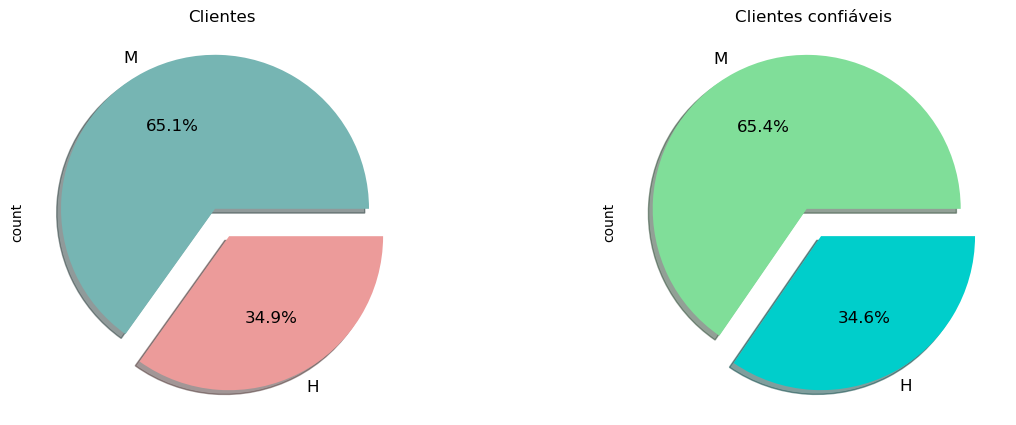

In [48]:
#Plotagem das informações de gênero dos clientes 

fig, axes = plt.subplots(1,2)


g1= new_df['COD_SEXO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Clientes")

g2= clientes_confiaveis['COD_SEXO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Clientes confiáveis")


fig.set_size_inches(14,5)

In [49]:
#Descrição estatística das idades dos clientes
new_df['IDADE'].describe()

count    9709.000000
mean       43.784093
std        11.625768
min        20.504186
25%        34.059563
50%        42.741466
75%        53.567151
max        68.863837
Name: IDADE, dtype: float64

In [50]:
#Descrição estatística das idades dos clientes confiáveis
clientes_confiaveis['IDADE'].describe()

count    8426.000000
mean       43.982121
std        11.623229
min        20.504186
25%        34.375791
50%        43.061801
75%        53.823829
max        68.863837
Name: IDADE, dtype: float64

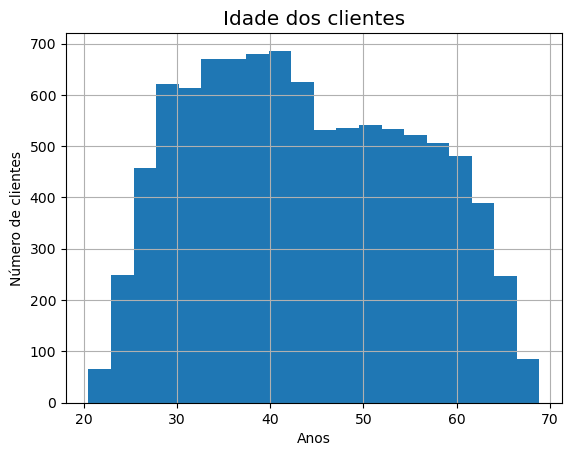

In [51]:
#Plotagem de histograma com as idades dos clientes
new_df.IDADE.hist(bins=20)
plt.style.use('ggplot')
plt.xlabel("Anos")
plt.ylabel("Número de clientes")
plt.title("Idade dos clientes")
plt.show()

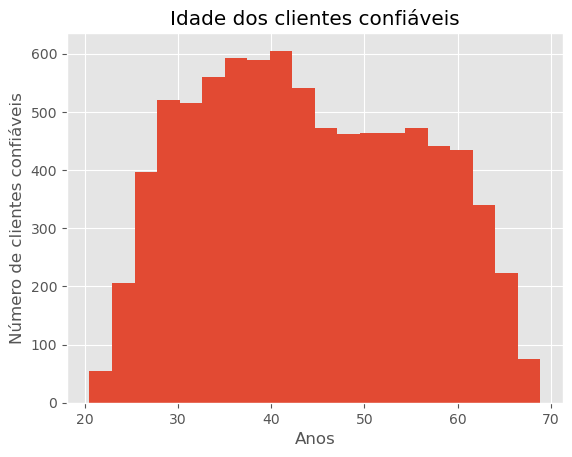

In [52]:
#Plotagem de histograma com as idades dos clientes confiáveis
clientes_confiaveis.IDADE.hist(bins=20)
plt.style.use('seaborn-pastel')
plt.xlabel("Anos")
plt.ylabel("Número de clientes confiáveis")
plt.title("Idade dos clientes confiáveis")
plt.show()

In [53]:
#Contagem dos níveis de escolaridade dos clientes

escolaridade_clientes = Counter(new_df['NIVEL_ESCOLARIDADE'].sort_values())
escolaridade_clientes

Counter({'Médio': 114,
         'Pós Graduado': 6,
         'Secundário': 6761,
         'Superior': 2457,
         'Superior Incompleto': 371})

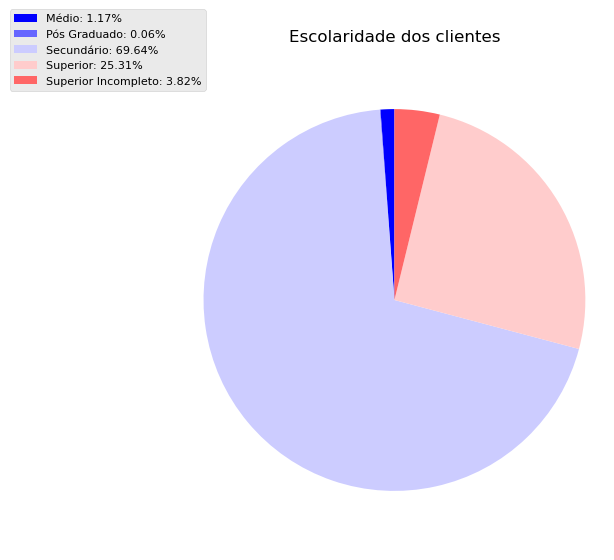

In [54]:
#Percentuais de escolaridade dos clientes

labels = []
sizes = []
n_clientes=sum(escolaridade_clientes.values())
for x, y in escolaridade_clientes.items():
    a = y/n_clientes*100
    labels.append(str(x) + ': ' + str(round(a,2)) + '%')
    sizes.append(round(a,2))


fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='center left',
    labels=labels,
    prop={'size': 8},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Escolaridade dos clientes",fontsize = 12,loc = 'center')

plt.show()


In [55]:
#Contagem dos níveis de escolaridade dos clientes confiáveis

escolaridade_clientes_confiaveis = Counter(clientes_confiaveis['NIVEL_ESCOLARIDADE'].sort_values())
escolaridade_clientes_confiaveis

Counter({'Médio': 100,
         'Pós Graduado': 4,
         'Secundário': 5890,
         'Superior': 2124,
         'Superior Incompleto': 308})

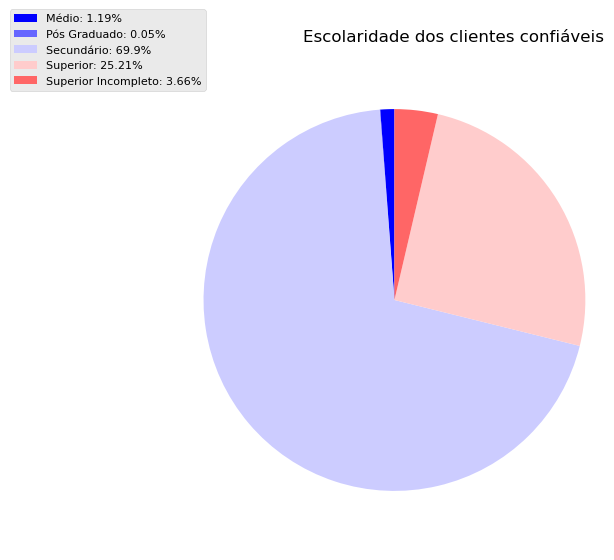

In [56]:
#Percentuais de escolaridade dos clientes confiáveis

labels = []
sizes = []
n_clientes_confiaveis=sum(escolaridade_clientes_confiaveis.values())
for x, y in escolaridade_clientes_confiaveis.items():
    a = y/n_clientes_confiaveis*100
    labels.append(str(x) + ': ' + str(round(a,2)) + '%')
    sizes.append(round(a,2))


fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='center left',
    labels=labels,
    prop={'size': 8},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Escolaridade dos clientes confiáveis",fontsize = 12,loc = 'right')

plt.show()


In [57]:
#Contagem do estado civil dos clientes

estado_civil_clientes = Counter(new_df['ESTADO_CIVIL'].sort_values())
estado_civil_clientes

Counter({'Casado': 6530,
         'Casado no civil': 836,
         'Separado': 574,
         'Solteiro': 1359,
         'Viúvo': 410})

In [58]:
#Identificação dos percentuais do estado civil dos clientes
n_estado_civil=sum(estado_civil_clientes.values())
for x, y in estado_civil_clientes.items():
    a = y/n_estado_civil*100
    print(str(x) + ': ' +'\n'+ str(round(a,2)) + '%'+'\n')

Casado: 
67.26%

Casado no civil: 
8.61%

Separado: 
5.91%

Solteiro: 
14.0%

Viúvo: 
4.22%



In [59]:
#Contagem dos níveis do estado civil dos clientes confiáveis

estado_civil_clientes_confiaveis = Counter(clientes_confiaveis['ESTADO_CIVIL'].sort_values())
estado_civil_clientes_confiaveis

Counter({'Casado': 5694,
         'Casado no civil': 716,
         'Separado': 503,
         'Solteiro': 1151,
         'Viúvo': 362})

In [60]:
#Identificação dos percentuais do estado civil dos clientes confiáveis
n_estado_civil_clientes_confiaveis=sum(estado_civil_clientes_confiaveis.values())
for x, y in estado_civil_clientes_confiaveis.items():
    a = y/n_estado_civil_clientes_confiaveis*100
    print(str(x) + ': ' +'\n'+ str(round(a,2)) + '%'+'\n')

Casado: 
67.58%

Casado no civil: 
8.5%

Separado: 
5.97%

Solteiro: 
13.66%

Viúvo: 
4.3%



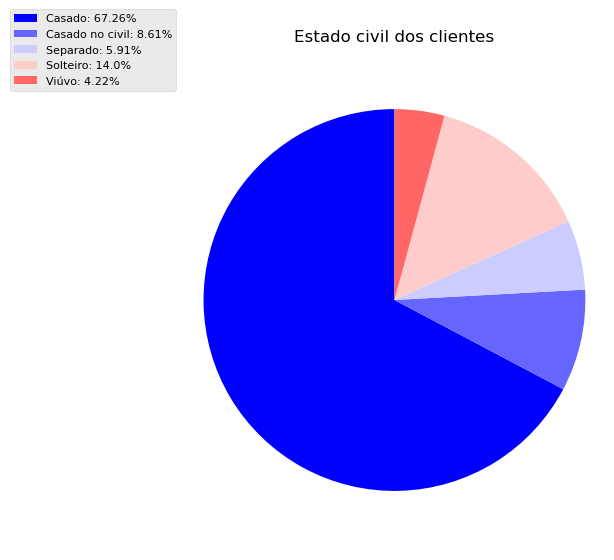

In [61]:
#Percentuais do estado civil dos clientes

labels = []
sizes = []
n_clientes=sum(estado_civil_clientes.values())
for x, y in estado_civil_clientes.items():
    a = y/n_clientes*100
    labels.append(str(x) + ': ' + str(round(a,2)) + '%')
    sizes.append(round(a,2))


fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='center left',
    labels=labels,
    prop={'size': 8},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Estado civil dos clientes",fontsize = 12,loc = 'center')

plt.show()


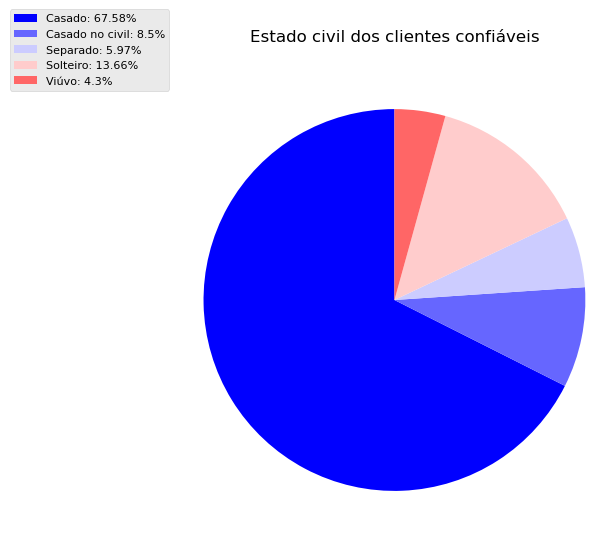

In [62]:
#Percentuais do estado civil dos clientes confiáveis

labels = []
sizes = []
n_clientes=sum(estado_civil_clientes_confiaveis.values())
for x, y in estado_civil_clientes_confiaveis.items():
    a = y/n_clientes*100
    labels.append(str(x) + ': ' + str(round(a,2)) + '%')
    sizes.append(round(a,2))


fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='center left',
    labels=labels,
    prop={'size': 8},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Estado civil dos clientes confiáveis",fontsize = 12,loc = 'center')

plt.show()


In [63]:
#descrição estatística dos valores da renda dos clientes
new_df['RENDA'].describe().astype('int')

count      9709
mean     170024
std       71150
min       27000
25%      112500
50%      157500
75%      208350
max      391500
Name: RENDA, dtype: int32

Text(0.5, 1.0, 'Distribuição da renda dos clientes')

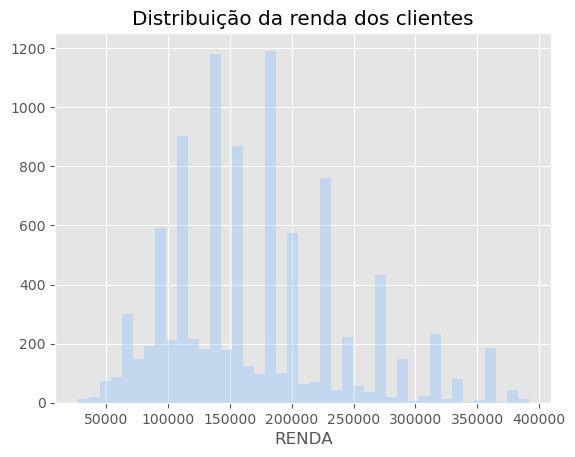

In [64]:
#Plotagem do histograma da renda dos clientes
sns.distplot(new_df.RENDA, kde=False)
plt.title('Distribuição da renda dos clientes')

In [65]:
#descrição estatística dos valores da renda dos clientes confiáveis
clientes_confiaveis['RENDA'].describe().astype('int')

count      8426
mean     169990
std       71451
min       27000
25%      112500
50%      157500
75%      207000
max      391500
Name: RENDA, dtype: int32

Text(0.5, 1.0, 'Distribuição da renda dos clientes confiáveis')

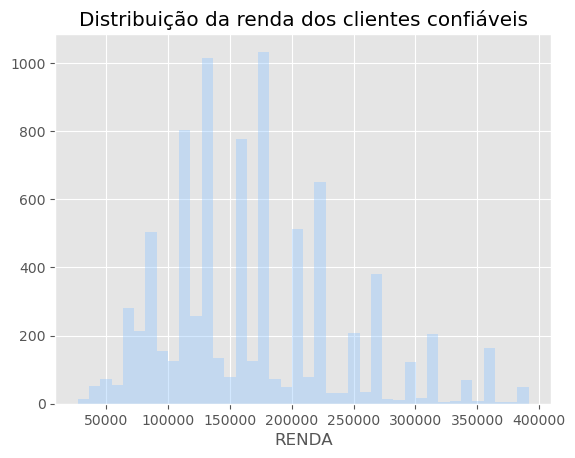

In [66]:
#Plotagem do histograma da renda dos clientes confiáveis
sns.distplot(clientes_confiaveis.RENDA, kde=False)
plt.title('Distribuição da renda dos clientes confiáveis')

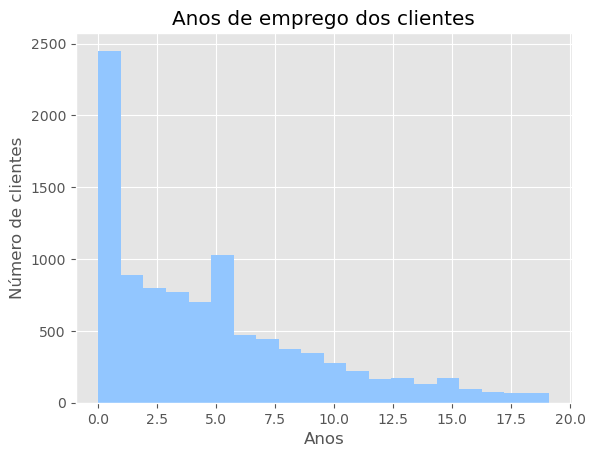

In [67]:
#Plotagem de histograma com os anos empregado dos clientes
new_df.ANOS_EMPREGADO.hist(bins=20)
plt.style.use('ggplot')
plt.xlabel("Anos")
plt.ylabel("Número de clientes")
plt.title("Anos de emprego dos clientes")
plt.show()

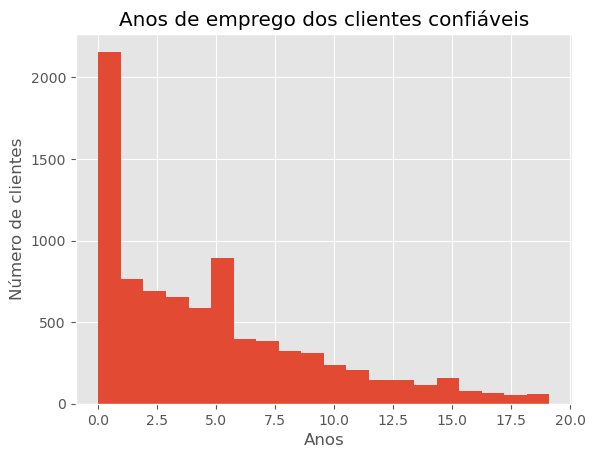

In [68]:
#Plotagem de histograma com os anos empregado dos clientes confiáveis
clientes_confiaveis.ANOS_EMPREGADO.hist(bins=20)
plt.style.use('seaborn-pastel')
plt.xlabel("Anos")
plt.ylabel("Número de clientes")
plt.title("Anos de emprego dos clientes confiáveis")
plt.show()

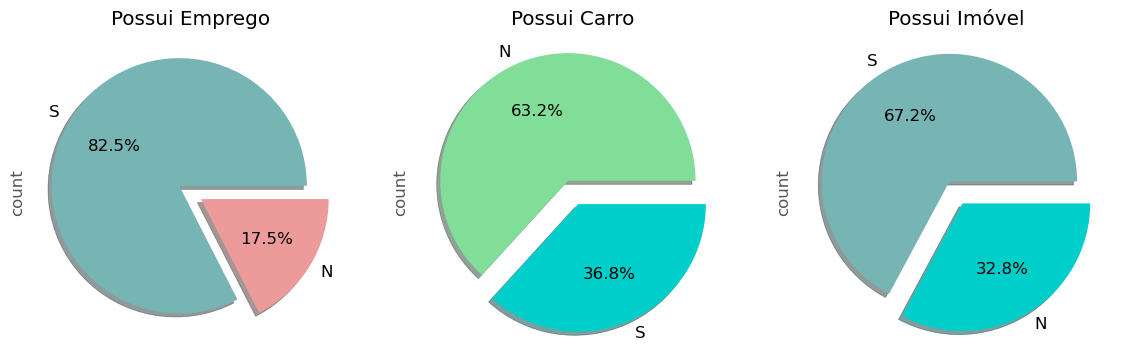

In [69]:
#Percentuais de emprego, carro e imóvel dos clientes 
fig, axes = plt.subplots(1,3)


g1= new_df['COD_TEM_EMPREGO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Possui Emprego")

g2= new_df['COD_TEM_CARRO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Possui Carro")

g3= new_df['COD_TEM_IMOVEL'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Possui Imóvel")

fig.set_size_inches(14,5)

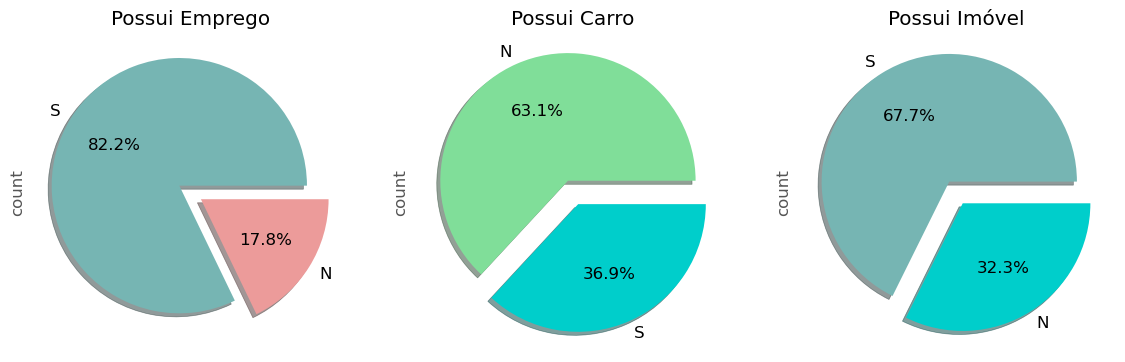

In [70]:
#Percentuais de emprego, carro e imóvel dos clientes confiáveis
fig, axes = plt.subplots(1,3)


g1= clientes_confiaveis['COD_TEM_EMPREGO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Possui Emprego")

g2= clientes_confiaveis['COD_TEM_CARRO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Possui Carro")

g3= clientes_confiaveis['COD_TEM_IMOVEL'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Possui Imóvel")

fig.set_size_inches(14,5)

In [71]:
#Contagem da profissão dos clientes

profissao_clientes = Counter(new_df['PROFISSAO'].sort_values())
profissao_clientes

Counter({'Contadores': 300,
         'Corretor imobiliário': 16,
         'Equipe de RH': 22,
         'Equipe de TI': 18,
         'Equipe de garçons barmen': 40,
         'Equipe de segurança': 182,
         'Equipe de vendas': 959,
         'Equipe médica': 291,
         'Equipe principal': 877,
         'Equipe técnica altamente qualificada': 357,
         'Gerentes': 782,
         'Motoristas': 623,
         'Operários': 1724,
         'Outro': 2994,
         'Pessoal de cozinha': 193,
         'Pessoal de limpeza': 146,
         'Pessoal de serviço privado': 86,
         'Secretários': 46,
         'Trabalhadores pouco qualificados': 53})

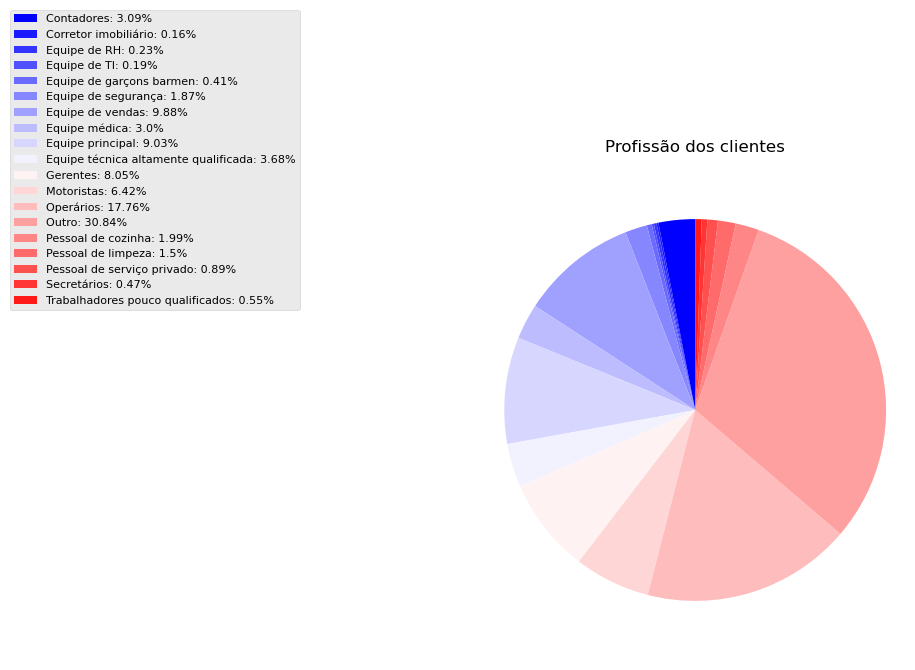

In [72]:
#Percentuais da profissão dos clientes

labels = []
sizes = []
n_clientes=sum(profissao_clientes.values())
for x, y in profissao_clientes.items():
    a = y/n_clientes*100
    labels.append(str(x) + ': ' + str(round(a,2)) + '%')
    sizes.append(round(a,2))


fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='center right',
    labels=labels,
    prop={'size': 8},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Profissão dos clientes",fontsize = 12,loc = 'center')

plt.show()

In [73]:
#Contagem da profissão dos clientes confiáveis

profissao_clientes_confiaveis = Counter(clientes_confiaveis['PROFISSAO'].sort_values())
profissao_clientes_confiaveis

Counter({'Contadores': 261,
         'Corretor imobiliário': 14,
         'Equipe de RH': 19,
         'Equipe de TI': 16,
         'Equipe de garçons barmen': 35,
         'Equipe de segurança': 152,
         'Equipe de vendas': 849,
         'Equipe médica': 246,
         'Equipe principal': 749,
         'Equipe técnica altamente qualificada': 307,
         'Gerentes': 671,
         'Motoristas': 534,
         'Operários': 1499,
         'Outro': 2624,
         'Pessoal de cozinha': 165,
         'Pessoal de limpeza': 126,
         'Pessoal de serviço privado': 76,
         'Secretários': 41,
         'Trabalhadores pouco qualificados': 42})

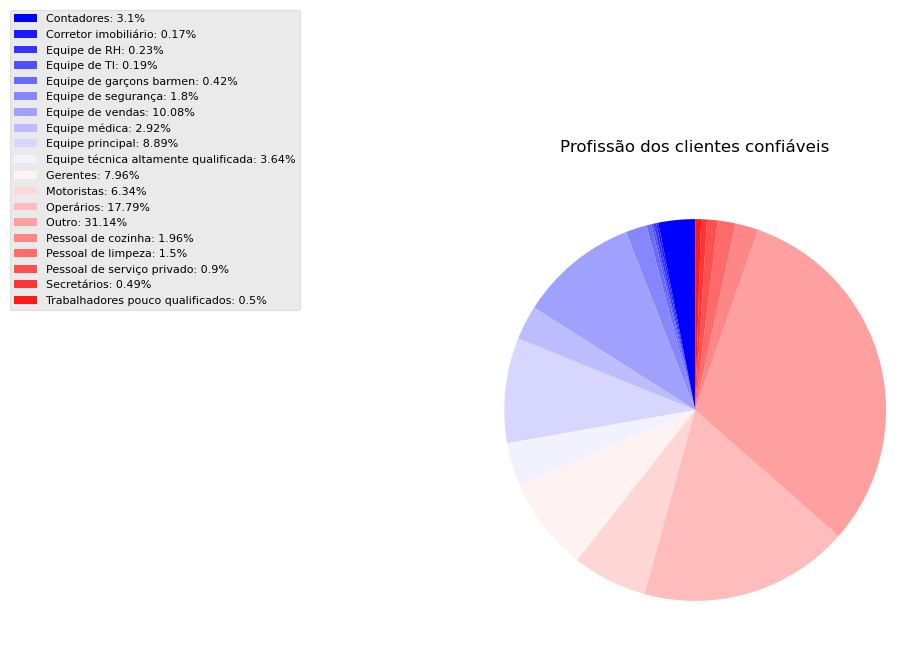

In [74]:
#Percentuais da profissão dos clientes

labels = []
sizes = []
n_clientes=sum(profissao_clientes_confiaveis.values())
for x, y in profissao_clientes_confiaveis.items():
    a = y/n_clientes*100
    labels.append(str(x) + ': ' + str(round(a,2)) + '%')
    sizes.append(round(a,2))


fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='center right',
    labels=labels,
    prop={'size': 8},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Profissão dos clientes confiáveis",fontsize = 12,loc = 'center')

plt.show()

In [75]:
outliers = find_outliers_IQR(new_df.NUM_MEMBROS_FAMILIA)

print("número de outliers NUM_MEMBROS_FAMILIA : " + str(len(outliers)))
print("max outlier : " + str(outliers.max()))
print("min outlier : " + str(outliers.min()))

outliers = find_outliers_IQR(new_df.ANOS_EMPREGADO)
print("número de outliers ANOS_EMPREGADO : " + str(len(outliers)))
print("max outlier : " + str(outliers.max()))
print("min outlier : " + str(outliers.min()))


outliers = find_outliers_IQR(new_df.NUM_FILHOS)
print("número de outliers NUM_FILHOS : " + str(len(outliers)))
print("max outlier : " + str(outliers.max()))
print("min outlier : " + str(outliers.min()))

outliers = find_outliers_IQR(new_df.RENDA)
print("número de outliers RENDA : " + str(len(outliers)))
print("max outlier : " + str(outliers.max()))
print("min outlier : " + str(outliers.min()))

número de outliers NUM_MEMBROS_FAMILIA : 0
max outlier : nan
min outlier : nan
número de outliers ANOS_EMPREGADO : 205
max outlier : 19.107853001772796
min outlier : 16.18103041130208
número de outliers NUM_FILHOS : 0
max outlier : nan
min outlier : nan
número de outliers RENDA : 245
max outlier : 391500.0
min outlier : 355500.0


# Código abaixo para verificar

Text(0.5, 1.0, 'Moradia')

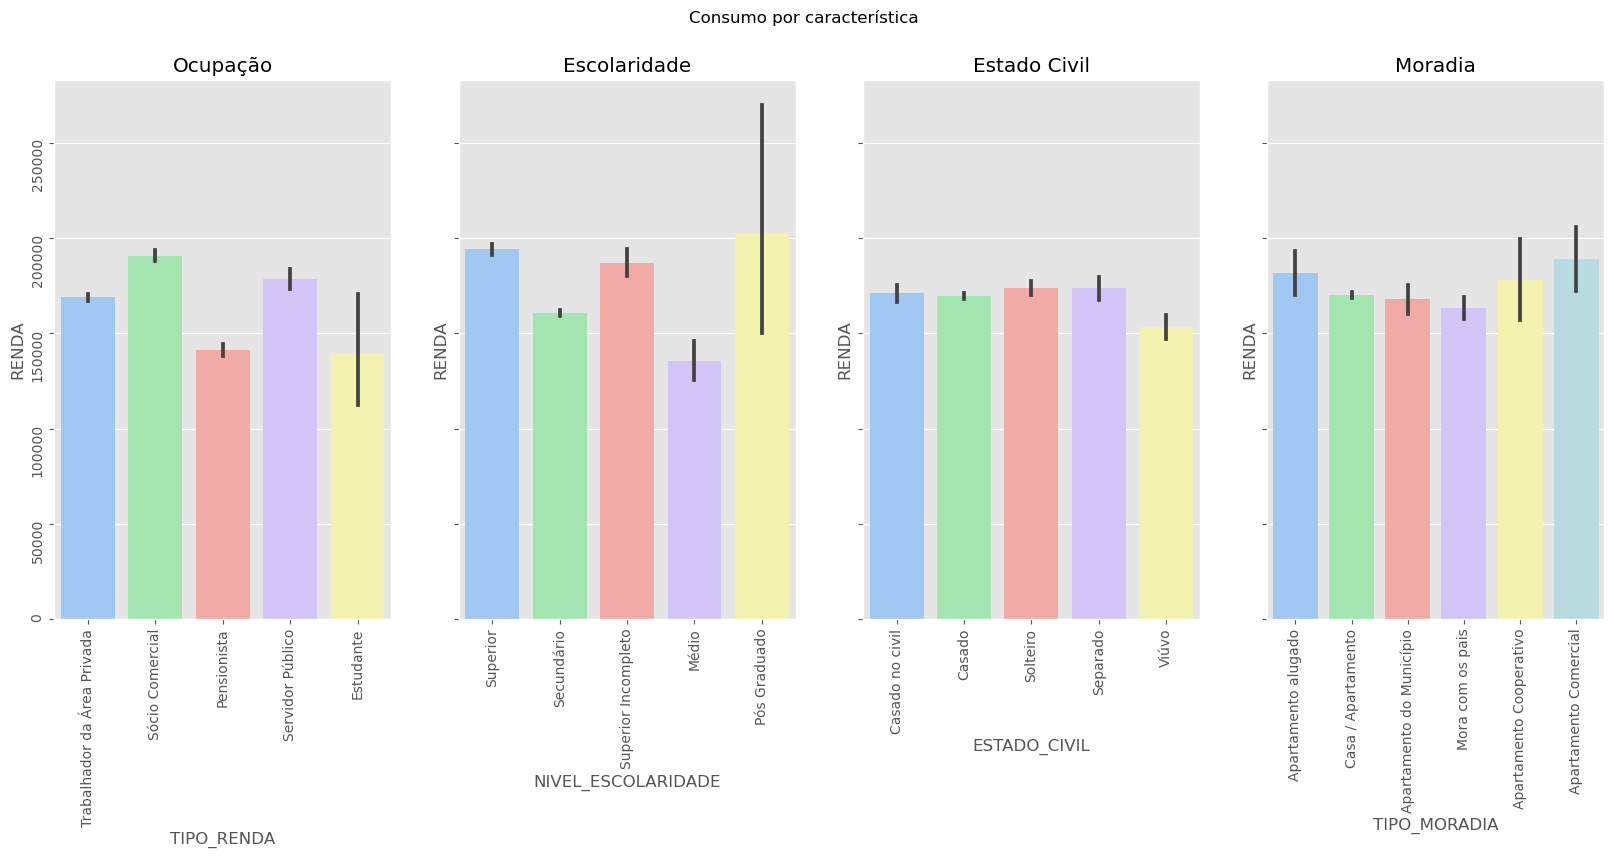

In [76]:
#### Vamos ver como são os níveis de consumo por categorias sociais


"""
#Plotagem do gráfico da ocupação

plt.style.use('seaborn-pastel')
plt.barh(new_df.TIPO_RENDA, 
         new_df.RENDA, color="green")
plt.ylabel('Ocupação')
plt.xlabel('Renda')
plt.title('Ocupação por Renda') 
plt.show()
"""

"""

#Plotagem do gráfico da nível de escolaridade
plt.style.use('seaborn-pastel')
#plt.style.use('ggplot')
plt.barh(new_df.NIVEL_ESCOLARIDADE, 
         new_df.RENDA)
plt.ylabel('Escolaridade')
plt.xlabel('Renda')
plt.title('Escolaridade por Renda') 
plt.show()


"""



fig, axes = plt.subplots(1, 4, figsize=(20, 7), sharey=True)
fig.suptitle('Consumo por característica')

sns.barplot(ax=axes[0], x=new_df.TIPO_RENDA, y=new_df.RENDA).tick_params(labelrotation=90)
axes[0].set_title("Ocupação")


sns.barplot(ax=axes[1], x=new_df.NIVEL_ESCOLARIDADE, y=new_df.RENDA).tick_params(labelrotation=90)
axes[1].set_title("Escolaridade")

sns.barplot(ax=axes[2], x=new_df.ESTADO_CIVIL, y=new_df.RENDA).tick_params(labelrotation=90)
axes[2].set_title("Estado Civil")

sns.barplot(ax=axes[3], x=new_df.TIPO_MORADIA, y=new_df.RENDA).tick_params(labelrotation=90)
axes[3].set_title("Moradia")



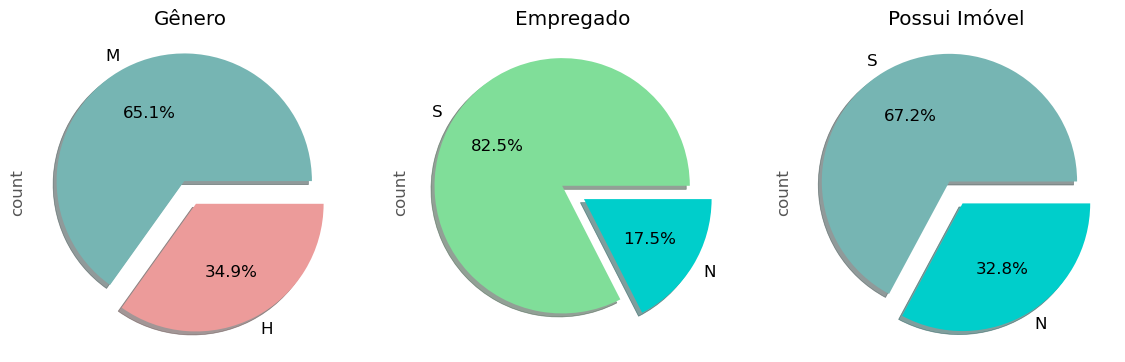

In [77]:




fig, axes = plt.subplots(1,3)


g1= new_df['COD_SEXO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Gênero")

g2= new_df['COD_TEM_EMPREGO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Empregado")

g3= new_df['COD_TEM_IMOVEL'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Possui Imóvel")

fig.set_size_inches(14,5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Outro'),
  Text(1, 0, 'Equipe de segurança'),
  Text(2, 0, 'Equipe de vendas'),
  Text(3, 0, 'Contadores'),
  Text(4, 0, 'Operários'),
  Text(5, 0, 'Gerentes'),
  Text(6, 0, 'Motoristas'),
  Text(7, 0, 'Equipe principal'),
  Text(8, 0, 'Equipe técnica altamente qualificada'),
  Text(9, 0, 'Pessoal de limpeza'),
  Text(10, 0, 'Pessoal de serviço privado'),
  Text(11, 0, 'Pessoal de cozinha'),
  Text(12, 0, 'Trabalhadores pouco qualificados'),
  Text(13, 0, 'Equipe médica'),
  Text(14, 0, 'Secretários'),
  Text(15, 0, 'Equipe de garçons barmen'),
  Text(16, 0, 'Equipe de RH'),
  Text(17, 0, 'Corretor imobiliário'),
  Text(18, 0, 'Equipe de TI')])

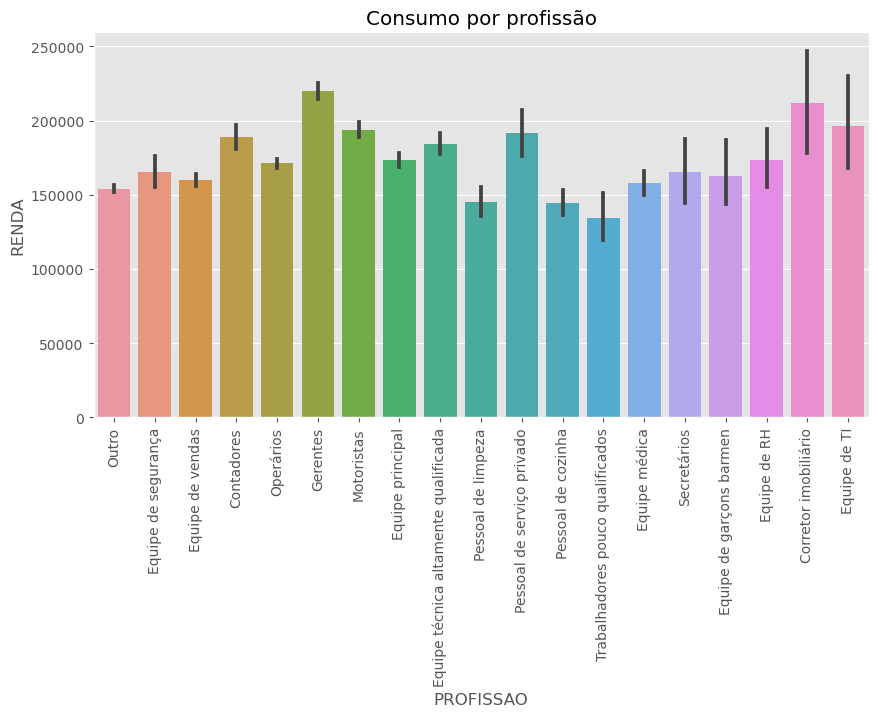

In [78]:

new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Other'], 'Outro')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Security staff'], 'Equipe de segurança')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Municipal apartment'], 'Apartamento do Município')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Sales staff'], 'Equipe de vendas')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Accountants'], 'Contadores')


new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Laborers'], 'Operários')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Managers'], 'Gerentes')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Drivers'], 'Motoristas')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Core staff'], 'Equipe principal')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['High skill tech staff'], 'Equipe técnica alta qualificação')


new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Cleaning staff'], 'Equipe de limpeza')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Private service staff'], 'Equipe de serviço privado')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Cooking staff'], 'Equipe de cozinha')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Low-skill Laborers'], 'Trabalhadores pouco qualificados')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Secretaries'], 'Secretários')


new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Medicine staff'], 'Equipe médica')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Waiters/barmen staff'], 'Equipe de garçons barmen')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['HR staff'], 'Equipe de RH')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['Realty agents'], 'Corretor imobiliário')
new_df['PROFISSAO'] = new_df['PROFISSAO'].replace(['IT staff'], 'Equipe de TI')



plt.figure(figsize =(10,5))
ax = sns.barplot(x="PROFISSAO", y="RENDA",data=new_df).set_title('Consumo por profissão')
plt.xticks(rotation=90)

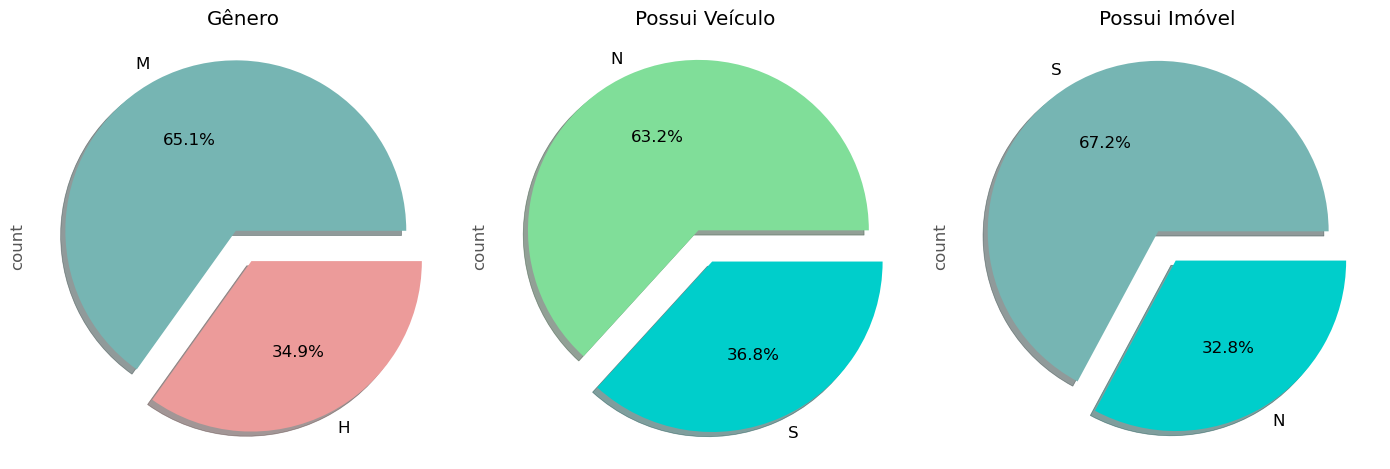

In [79]:
#new_df['COD_SEXO'] = new_df['COD_SEXO'].replace(['M'], 'H')
#new_df['COD_SEXO'] = new_df['COD_SEXO'].replace(['F'], 'M')
#new_df['COD_TEM_CARRO'] = new_df['COD_TEM_CARRO'].replace(['Y'], 'S')
#new_df['COD_TEM_IMOVEL'] = new_df['COD_TEM_IMOVEL'].replace(['Y'], 'S')




fig, axes = plt.subplots(1,3)


g1= new_df['COD_SEXO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Gênero")

g2= new_df['COD_TEM_CARRO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Possui Veículo")

g3= new_df['COD_TEM_IMOVEL'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Possui Imóvel")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()


# Criação de Modelos de Machine Learning

In [80]:
#Converter as varáveis categóricas para numéricas

In [81]:
new_df["COD_SEXO"] =  new_df['COD_SEXO'].replace(['H','M'],[0,1])
new_df["COD_TEM_CARRO"] = new_df["COD_TEM_CARRO"].replace(["S","N"],[1,0])
new_df["COD_TEM_IMOVEL"] = new_df["COD_TEM_IMOVEL"].replace(["S","N"],[1,0])
new_df["COD_TEM_EMPREGO"] = new_df["COD_TEM_EMPREGO"].replace(["S","N"],[1,0])

Para que se possa avaliar os algoritmos mencionados, optou-se por realizar alguns ajustes no dataframe new_df. Como boa prática, os dados categóricos serão transformados em valores inteiros, mais especificamente as colunas NIVEL_ESCOLARIDADE, ESTADO_CIVIL,  TIPO_MORADIA e PROFISSAO.

In [82]:
print(new_df['NIVEL_ESCOLARIDADE'].unique())

['Superior' 'Secundário' 'Superior Incompleto' 'Médio' 'Pós Graduado']


In [83]:

nivel_escolaridade = {'Secundário':'SECUNDARIO',
                     'Médio':'SECUNDARIO',
                     'Superior':'SUPERIOR',
                     'Superior Incompleto':'SUPERIOR_INCOMPLETO',
                     'Pós Graduado':'SUPERIOR'}

new_df["NIVEL_ESCOLARIDADE"] = new_df["NIVEL_ESCOLARIDADE"].map(nivel_escolaridade)
new_df= pd.get_dummies(new_df, columns=['NIVEL_ESCOLARIDADE'])


In [84]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      9709 non-null   int64  
 1   COD_SEXO                                9709 non-null   int64  
 2   COD_TEM_CARRO                           9709 non-null   int64  
 3   COD_TEM_IMOVEL                          9709 non-null   int64  
 4   NUM_FILHOS                              9709 non-null   float64
 5   RENDA                                   9709 non-null   float64
 6   TIPO_RENDA                              9709 non-null   object 
 7   ESTADO_CIVIL                            9709 non-null   object 
 8   TIPO_MORADIA                            9709 non-null   object 
 9   COD_TEL_TRABALHO                        9709 non-null   int64  
 10  COD_TEM_TELEFONE                        9709 non-null   int6

In [85]:

new_df["NIVEL_ESCOLARIDADE_SECUNDARIO"] =  new_df['NIVEL_ESCOLARIDADE_SECUNDARIO'].replace({True: 1, False: 0})
new_df["NIVEL_ESCOLARIDADE_SUPERIOR"] =  new_df['NIVEL_ESCOLARIDADE_SUPERIOR'].replace({True: 1, False: 0})
new_df["NIVEL_ESCOLARIDADE_SUPERIOR_INCOMPLETO"] =  new_df['NIVEL_ESCOLARIDADE_SUPERIOR_INCOMPLETO'].replace({True: 1, False: 0})


In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      9709 non-null   int64  
 1   COD_SEXO                                9709 non-null   int64  
 2   COD_TEM_CARRO                           9709 non-null   int64  
 3   COD_TEM_IMOVEL                          9709 non-null   int64  
 4   NUM_FILHOS                              9709 non-null   float64
 5   RENDA                                   9709 non-null   float64
 6   TIPO_RENDA                              9709 non-null   object 
 7   ESTADO_CIVIL                            9709 non-null   object 
 8   TIPO_MORADIA                            9709 non-null   object 
 9   COD_TEL_TRABALHO                        9709 non-null   int64  
 10  COD_TEM_TELEFONE                        9709 non-null   int6

In [87]:
print(new_df['TIPO_MORADIA'].unique())


['Apartamento alugado' 'Casa / Apartamento' 'Apartamento do Município'
 'Mora com os pais' 'Apartamento Cooperativo' 'Apartamento Comercial']


In [88]:
tipo_moradia = {'Casa / Apartamento' : 'CASA_APARTAMENTO',
                'Mora com os pais': 'COM_OS_PAIS',
                'Apartamento Comercial' : 'CASA_APARTAMENTO',
                'Apartamento alugado': 'CASA_APARTAMENTO',
                'Apartamento do Município': 'CASA_APARTAMENTO',
                'Apartamento Cooperativo': 'CASA_APARTAMENTO'}

new_df["TIPO_MORADIA"] = new_df['TIPO_MORADIA'].map(tipo_moradia)
new_df= pd.get_dummies(new_df, columns=['TIPO_MORADIA'])


In [89]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      9709 non-null   int64  
 1   COD_SEXO                                9709 non-null   int64  
 2   COD_TEM_CARRO                           9709 non-null   int64  
 3   COD_TEM_IMOVEL                          9709 non-null   int64  
 4   NUM_FILHOS                              9709 non-null   float64
 5   RENDA                                   9709 non-null   float64
 6   TIPO_RENDA                              9709 non-null   object 
 7   ESTADO_CIVIL                            9709 non-null   object 
 8   COD_TEL_TRABALHO                        9709 non-null   int64  
 9   COD_TEM_TELEFONE                        9709 non-null   int64  
 10  COD_TEM_EMAIL                           9709 non-null   int6

In [90]:
print(new_df['ESTADO_CIVIL'].unique())


['Casado no civil' 'Casado' 'Solteiro' 'Separado' 'Viúvo']


In [91]:
estado_civil = {'Solteiro':'SOLTEIRO',
                'Separado':'SOLTEIRO',
                'Viúvo':'SOLTEIRO',
                'Casado no civil':'CASADO',
                'Casado':'CASADO'}

new_df["ESTADO_CIVIL"] = new_df["ESTADO_CIVIL"].map(estado_civil)
new_df= pd.get_dummies(new_df, columns=['ESTADO_CIVIL'])


In [92]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      9709 non-null   int64  
 1   COD_SEXO                                9709 non-null   int64  
 2   COD_TEM_CARRO                           9709 non-null   int64  
 3   COD_TEM_IMOVEL                          9709 non-null   int64  
 4   NUM_FILHOS                              9709 non-null   float64
 5   RENDA                                   9709 non-null   float64
 6   TIPO_RENDA                              9709 non-null   object 
 7   COD_TEL_TRABALHO                        9709 non-null   int64  
 8   COD_TEM_TELEFONE                        9709 non-null   int64  
 9   COD_TEM_EMAIL                           9709 non-null   int64  
 10  PROFISSAO                               9709 non-null   obje

In [93]:
print(new_df['TIPO_RENDA'].unique())

['Trabalhador da Área Privada' 'Sócio Comercial' 'Pensionista'
 'Servidor Público' 'Estudante']


In [94]:
tipo_renda = {'Sócio Comercial':'TRABALHANDO',
                  'Servidor Público':'TRABALHANDO',
                  'Trabalhador da Área Privada':'TRABALHANDO',
                  'Pensionista':'PENSIONISTA',
                  'Estudante':'ESTUDANTE'}

new_df["TIPO_RENDA"] = new_df["TIPO_RENDA"].map(tipo_renda)
new_df= pd.get_dummies(new_df, columns=['TIPO_RENDA'])


In [95]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      9709 non-null   int64  
 1   COD_SEXO                                9709 non-null   int64  
 2   COD_TEM_CARRO                           9709 non-null   int64  
 3   COD_TEM_IMOVEL                          9709 non-null   int64  
 4   NUM_FILHOS                              9709 non-null   float64
 5   RENDA                                   9709 non-null   float64
 6   COD_TEL_TRABALHO                        9709 non-null   int64  
 7   COD_TEM_TELEFONE                        9709 non-null   int64  
 8   COD_TEM_EMAIL                           9709 non-null   int64  
 9   PROFISSAO                               9709 non-null   object 
 10  NUM_MEMBROS_FAMILIA                     9709 non-null   floa

In [96]:
print(new_df['PROFISSAO'].unique())


['Outro' 'Equipe de segurança' 'Equipe de vendas' 'Contadores' 'Operários'
 'Gerentes' 'Motoristas' 'Equipe principal'
 'Equipe técnica altamente qualificada' 'Pessoal de limpeza'
 'Pessoal de serviço privado' 'Pessoal de cozinha'
 'Trabalhadores pouco qualificados' 'Equipe médica' 'Secretários'
 'Equipe de garçons barmen' 'Equipe de RH' 'Corretor imobiliário'
 'Equipe de TI']


In [97]:
profissao = {'Outro': 'Outro', 'Equipe de segurança': 'Equipe_de_segurança','Equipe de vendas' : 'Equipe_de_vendas',
             'Contadores' : 'Contadores',  'Operários' :'Operários', 'Gerentes':'Gerentes', 'Motoristas':'Motoristas',
             'Equipe principal' : 'Equipe_principal','Equipe técnica altamente qualificada' : 'Equipe_técnica_altamente_qualificada', 
             'Pessoal de limpeza' : 'Pessoal_de_limpeza', 'Pessoal de serviço privado' : 'Pessoal_de_serviço_privado',
             'Pessoal de cozinha' : 'Pessoal_de_cozinha', 'Trabalhadores pouco qualificados' : 'Trabalhadores_pouco_qualificados',
             'Equipe médica': 'Equipe_médica', 'Secretários' : 'Secretários', 'Equipe de garçons barmen' : 'Equipe_de_garçons_barmen',
             'Equipe de RH':  'Equipe_de_RH', 'Corretor imobiliário' : 'Corretor_imobiliário', 'Equipe de TI' : 'Equipe_de_TI' }

new_df["PROFISSAO"] = new_df["PROFISSAO"].map(profissao)
new_df= pd.get_dummies(new_df, columns=['PROFISSAO'])

In [98]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              9709 non-null   int64  
 1   COD_SEXO                                        9709 non-null   int64  
 2   COD_TEM_CARRO                                   9709 non-null   int64  
 3   COD_TEM_IMOVEL                                  9709 non-null   int64  
 4   NUM_FILHOS                                      9709 non-null   float64
 5   RENDA                                           9709 non-null   float64
 6   COD_TEL_TRABALHO                                9709 non-null   int64  
 7   COD_TEM_TELEFONE                                9709 non-null   int64  
 8   COD_TEM_EMAIL                                   9709 non-null   int64  
 9   NUM_MEMBROS_FAMILIA                      

In [99]:
new_df["PROFISSAO_Contadores"] =  new_df['PROFISSAO_Contadores'].replace({True: 1, False: 0})
new_df["PROFISSAO_Corretor_imobiliário"] =  new_df['PROFISSAO_Corretor_imobiliário'].replace({True: 1, False: 0})
new_df["PROFISSAO_Equipe_de_RH"] =  new_df['PROFISSAO_Equipe_de_RH'].replace({True: 1, False: 0})

new_df["PROFISSAO_Equipe_de_TI"] =  new_df['PROFISSAO_Equipe_de_TI'].replace({True: 1, False: 0})
new_df["PROFISSAO_Equipe_de_garçons_barmen"] =  new_df['PROFISSAO_Equipe_de_garçons_barmen'].replace({True: 1, False: 0})
new_df["PROFISSAO_Equipe_de_segurança"] =  new_df['PROFISSAO_Equipe_de_segurança'].replace({True: 1, False: 0})


new_df["PROFISSAO_Equipe_de_vendas"] =  new_df['PROFISSAO_Equipe_de_vendas'].replace({True: 1, False: 0})
new_df["PROFISSAO_Equipe_médica"] =  new_df['PROFISSAO_Equipe_médica'].replace({True: 1, False: 0})
new_df["PROFISSAO_Equipe_principal"] =  new_df['PROFISSAO_Equipe_principal'].replace({True: 1, False: 0})


new_df["PROFISSAO_Equipe_técnica_altamente_qualificada"] =  new_df['PROFISSAO_Equipe_técnica_altamente_qualificada'].replace({True: 1, False: 0})
new_df["PROFISSAO_Gerentes"] =  new_df['PROFISSAO_Gerentes'].replace({True: 1, False: 0})
new_df["PROFISSAO_Motoristas"] =  new_df['PROFISSAO_Motoristas'].replace({True: 1, False: 0})


new_df["PROFISSAO_Operários"] =  new_df['PROFISSAO_Operários'].replace({True: 1, False: 0})
new_df["PROFISSAO_Outro"] =  new_df['PROFISSAO_Outro'].replace({True: 1, False: 0})
new_df["PROFISSAO_Pessoal_de_cozinha"] =  new_df['PROFISSAO_Pessoal_de_cozinha'].replace({True: 1, False: 0})


new_df["PROFISSAO_Pessoal_de_limpeza"] =  new_df['PROFISSAO_Pessoal_de_limpeza'].replace({True: 1, False: 0})
new_df["PROFISSAO_Pessoal_de_serviço_privado"] =  new_df['PROFISSAO_Pessoal_de_serviço_privado'].replace({True: 1, False: 0})
new_df["PROFISSAO_Secretários"] =  new_df['PROFISSAO_Secretários'].replace({True: 1, False: 0})
new_df["PROFISSAO_Trabalhadores_pouco_qualificados"] =  new_df['PROFISSAO_Trabalhadores_pouco_qualificados'].replace({True: 1, False: 0})


In [100]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              9709 non-null   int64  
 1   COD_SEXO                                        9709 non-null   int64  
 2   COD_TEM_CARRO                                   9709 non-null   int64  
 3   COD_TEM_IMOVEL                                  9709 non-null   int64  
 4   NUM_FILHOS                                      9709 non-null   float64
 5   RENDA                                           9709 non-null   float64
 6   COD_TEL_TRABALHO                                9709 non-null   int64  
 7   COD_TEM_TELEFONE                                9709 non-null   int64  
 8   COD_TEM_EMAIL                                   9709 non-null   int64  
 9   NUM_MEMBROS_FAMILIA                      

In [101]:
new_df["TIPO_MORADIA_CASA_APARTAMENTO"] =  new_df['TIPO_MORADIA_CASA_APARTAMENTO'].replace({True: 1, False: 0})
new_df["TIPO_MORADIA_COM_OS_PAIS"] =  new_df['TIPO_MORADIA_COM_OS_PAIS'].replace({True: 1, False: 0})

In [102]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              9709 non-null   int64  
 1   COD_SEXO                                        9709 non-null   int64  
 2   COD_TEM_CARRO                                   9709 non-null   int64  
 3   COD_TEM_IMOVEL                                  9709 non-null   int64  
 4   NUM_FILHOS                                      9709 non-null   float64
 5   RENDA                                           9709 non-null   float64
 6   COD_TEL_TRABALHO                                9709 non-null   int64  
 7   COD_TEM_TELEFONE                                9709 non-null   int64  
 8   COD_TEM_EMAIL                                   9709 non-null   int64  
 9   NUM_MEMBROS_FAMILIA                      

In [103]:

new_df["NIVEL_ESCOLARIDADE_SECUNDARIO"] =  new_df['NIVEL_ESCOLARIDADE_SECUNDARIO'].replace({True: 1, False: 0})
new_df["NIVEL_ESCOLARIDADE_SUPERIOR"] =  new_df['NIVEL_ESCOLARIDADE_SUPERIOR'].replace({True: 1, False: 0})
new_df["NIVEL_ESCOLARIDADE_SUPERIOR_INCOMPLETO"] =  new_df['NIVEL_ESCOLARIDADE_SUPERIOR_INCOMPLETO'].replace({True: 1, False: 0})


In [104]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              9709 non-null   int64  
 1   COD_SEXO                                        9709 non-null   int64  
 2   COD_TEM_CARRO                                   9709 non-null   int64  
 3   COD_TEM_IMOVEL                                  9709 non-null   int64  
 4   NUM_FILHOS                                      9709 non-null   float64
 5   RENDA                                           9709 non-null   float64
 6   COD_TEL_TRABALHO                                9709 non-null   int64  
 7   COD_TEM_TELEFONE                                9709 non-null   int64  
 8   COD_TEM_EMAIL                                   9709 non-null   int64  
 9   NUM_MEMBROS_FAMILIA                      

In [105]:
new_df["ESTADO_CIVIL_CASADO"] =  new_df['ESTADO_CIVIL_CASADO'].replace({True: 1, False: 0})
new_df["ESTADO_CIVIL_SOLTEIRO"] =  new_df['ESTADO_CIVIL_SOLTEIRO'].replace({True: 1, False: 0})
new_df["TIPO_RENDA_ESTUDANTE"] =  new_df['TIPO_RENDA_ESTUDANTE'].replace({True: 1, False: 0})
new_df["TIPO_RENDA_PENSIONISTA"] =  new_df['TIPO_RENDA_PENSIONISTA'].replace({True: 1, False: 0})
new_df["TIPO_RENDA_TRABALHANDO"] =  new_df['TIPO_RENDA_TRABALHANDO'].replace({True: 1, False: 0})

In [106]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              9709 non-null   int64  
 1   COD_SEXO                                        9709 non-null   int64  
 2   COD_TEM_CARRO                                   9709 non-null   int64  
 3   COD_TEM_IMOVEL                                  9709 non-null   int64  
 4   NUM_FILHOS                                      9709 non-null   float64
 5   RENDA                                           9709 non-null   float64
 6   COD_TEL_TRABALHO                                9709 non-null   int64  
 7   COD_TEM_TELEFONE                                9709 non-null   int64  
 8   COD_TEM_EMAIL                                   9709 non-null   int64  
 9   NUM_MEMBROS_FAMILIA                      

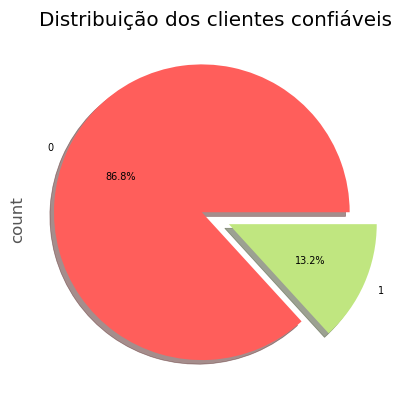

In [107]:
new_df['RESULTADO'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=['#FF5E5B', '#C0E680'],textprops = {'fontsize':7}).set_title("Distribuição dos clientes confiáveis")

plt.show()

In [108]:
#Importação da função resample da biblioteca sklearn
from sklearn.utils import resample

In [109]:
#Criação de um dataframe apenas com os clientes não confiáveis
new_df_nao_confiaveis = new_df[new_df.RESULTADO==0]
new_df_nao_confiaveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8426 entries, 1 to 9591
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              8426 non-null   int64  
 1   COD_SEXO                                        8426 non-null   int64  
 2   COD_TEM_CARRO                                   8426 non-null   int64  
 3   COD_TEM_IMOVEL                                  8426 non-null   int64  
 4   NUM_FILHOS                                      8426 non-null   float64
 5   RENDA                                           8426 non-null   float64
 6   COD_TEL_TRABALHO                                8426 non-null   int64  
 7   COD_TEM_TELEFONE                                8426 non-null   int64  
 8   COD_TEM_EMAIL                                   8426 non-null   int64  
 9   NUM_MEMBROS_FAMILIA                           

In [110]:
#Criação de um dataframe apenas com os clientes confiáveis
new_df_confiaveis = new_df[new_df.RESULTADO==1]
new_df_confiaveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1283 entries, 0 to 9708
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              1283 non-null   int64  
 1   COD_SEXO                                        1283 non-null   int64  
 2   COD_TEM_CARRO                                   1283 non-null   int64  
 3   COD_TEM_IMOVEL                                  1283 non-null   int64  
 4   NUM_FILHOS                                      1283 non-null   float64
 5   RENDA                                           1283 non-null   float64
 6   COD_TEL_TRABALHO                                1283 non-null   int64  
 7   COD_TEM_TELEFONE                                1283 non-null   int64  
 8   COD_TEM_EMAIL                                   1283 non-null   int64  
 9   NUM_MEMBROS_FAMILIA                           

In [111]:
#Contagem dos clientes confiáveis e não confiáveis
new_df['RESULTADO'].value_counts()

RESULTADO
0    8426
1    1283
Name: count, dtype: int64

In [112]:
#Ajuste no número de entradas do dataframe de clientes confiáveis
new_df_confiaveis_upsampled = resample(new_df_confiaveis, 
                                                 replace=True, n_samples=8426, 
                                                 random_state=123)

In [113]:
new_df_confiaveis_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8426 entries, 9216 to 5635
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              8426 non-null   int64  
 1   COD_SEXO                                        8426 non-null   int64  
 2   COD_TEM_CARRO                                   8426 non-null   int64  
 3   COD_TEM_IMOVEL                                  8426 non-null   int64  
 4   NUM_FILHOS                                      8426 non-null   float64
 5   RENDA                                           8426 non-null   float64
 6   COD_TEL_TRABALHO                                8426 non-null   int64  
 7   COD_TEM_TELEFONE                                8426 non-null   int64  
 8   COD_TEM_EMAIL                                   8426 non-null   int64  
 9   NUM_MEMBROS_FAMILIA                        

In [114]:
#Concatenação dos dataframes dos clientes confiáveis e não confiáveis
new_df_final_upsampled = pd.concat([new_df_nao_confiaveis, 
                                          new_df_confiaveis_upsampled])

In [115]:
new_df_final_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16852 entries, 1 to 5635
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              16852 non-null  int64  
 1   COD_SEXO                                        16852 non-null  int64  
 2   COD_TEM_CARRO                                   16852 non-null  int64  
 3   COD_TEM_IMOVEL                                  16852 non-null  int64  
 4   NUM_FILHOS                                      16852 non-null  float64
 5   RENDA                                           16852 non-null  float64
 6   COD_TEL_TRABALHO                                16852 non-null  int64  
 7   COD_TEM_TELEFONE                                16852 non-null  int64  
 8   COD_TEM_EMAIL                                   16852 non-null  int64  
 9   NUM_MEMBROS_FAMILIA                          

In [116]:
#Contagem dos clientes confiáveis e não confiáveis
new_df_final_upsampled['RESULTADO'].value_counts()

RESULTADO
0    8426
1    8426
Name: count, dtype: int64

In [117]:
#Importação da função train_test_split
from sklearn.model_selection import train_test_split

In [118]:
#Divisão para as bases de treinamento
X_train = new_df_final_upsampled.drop(['RESULTADO'], axis = 1)
y_train = new_df_final_upsampled.RESULTADO

In [119]:
#Informações do dataframe com os dados para treinamento
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16852 entries, 1 to 5635
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              16852 non-null  int64  
 1   COD_SEXO                                        16852 non-null  int64  
 2   COD_TEM_CARRO                                   16852 non-null  int64  
 3   COD_TEM_IMOVEL                                  16852 non-null  int64  
 4   NUM_FILHOS                                      16852 non-null  float64
 5   RENDA                                           16852 non-null  float64
 6   COD_TEL_TRABALHO                                16852 non-null  int64  
 7   COD_TEM_TELEFONE                                16852 non-null  int64  
 8   COD_TEM_EMAIL                                   16852 non-null  int64  
 9   NUM_MEMBROS_FAMILIA                          

In [120]:
#Criação das bases de teste e treinamento
xtreinamento, xteste, ytreinamento, yteste = train_test_split(X_train, y_train, random_state = 0)

In [121]:
#Informação do dataframe de treinamento
xtreinamento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12639 entries, 737 to 3126
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              12639 non-null  int64  
 1   COD_SEXO                                        12639 non-null  int64  
 2   COD_TEM_CARRO                                   12639 non-null  int64  
 3   COD_TEM_IMOVEL                                  12639 non-null  int64  
 4   NUM_FILHOS                                      12639 non-null  float64
 5   RENDA                                           12639 non-null  float64
 6   COD_TEL_TRABALHO                                12639 non-null  int64  
 7   COD_TEM_TELEFONE                                12639 non-null  int64  
 8   COD_TEM_EMAIL                                   12639 non-null  int64  
 9   NUM_MEMBROS_FAMILIA                        

In [122]:
#Informação do dataframe de teste
xteste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 1169 to 8083
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4213 non-null   int64  
 1   COD_SEXO                                        4213 non-null   int64  
 2   COD_TEM_CARRO                                   4213 non-null   int64  
 3   COD_TEM_IMOVEL                                  4213 non-null   int64  
 4   NUM_FILHOS                                      4213 non-null   float64
 5   RENDA                                           4213 non-null   float64
 6   COD_TEL_TRABALHO                                4213 non-null   int64  
 7   COD_TEM_TELEFONE                                4213 non-null   int64  
 8   COD_TEM_EMAIL                                   4213 non-null   int64  
 9   NUM_MEMBROS_FAMILIA                        

In [123]:
#Contagem dos resultados para treinamento
ytreinamento.count()

12639

In [124]:
#Contagem dos resultados para teste
yteste.count()

4213

In [125]:
#Dataframe com os resultados
df_resultados = pd.DataFrame(columns=('Algoritmo','Acurácia de previsão', 'Precisão', 'Revocação','F1-Score'))


In [126]:
#Importação das funções para as medidas de avaliação dos algoritmos
from sklearn.metrics import accuracy_score, classification_report

In [127]:
#Criação do modelo utilizando a Árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clientes_tree = DecisionTreeClassifier(random_state=0)
clientes_tree = clientes_tree.fit(xtreinamento, ytreinamento)
print("Acurácia: ", clientes_tree.score(xtreinamento, ytreinamento))
Train_predict = clientes_tree.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, Train_predict))
print(classification_report(yteste, Train_predict))

Acurácia:  1.0
Acurácia de previsão:  0.9157370045098505
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2115
           1       0.86      1.00      0.92      2098

    accuracy                           0.92      4213
   macro avg       0.93      0.92      0.92      4213
weighted avg       0.93      0.92      0.92      4213



In [128]:
new_row = {'Algoritmo': 'Árvore de decisão', 'Acurácia de previsão': 0.91, 'Precisão': 0.93,'Revocação':0.92,'F1-Score':0.92} 
df_resultados.loc[len(df_resultados)] = new_row
print(df_resultados)

           Algoritmo  Acurácia de previsão  Precisão  Revocação  F1-Score
0  Árvore de decisão                  0.91      0.93       0.92      0.92


In [129]:
#Criação do modelo utilizando a Regressão Logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(xtreinamento, ytreinamento)
print("Acurácia: ", lr.score(xtreinamento, ytreinamento))
tp_lr = lr.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_lr))
print(classification_report(yteste, tp_lr))

Acurácia:  0.5027296463327795
Acurácia de previsão:  0.486589128886779
              precision    recall  f1-score   support

           0       0.48      0.31      0.38      2115
           1       0.49      0.66      0.56      2098

    accuracy                           0.49      4213
   macro avg       0.49      0.49      0.47      4213
weighted avg       0.49      0.49      0.47      4213



In [130]:
new_row = {'Algoritmo': 'Regressão Logística', 'Acurácia de previsão': 0.48, 'Precisão': 0.49,'Revocação':0.49,'F1-Score':0.47} 
df_resultados.loc[len(df_resultados)] = new_row
print(df_resultados)

             Algoritmo  Acurácia de previsão  Precisão  Revocação  F1-Score
0    Árvore de decisão                  0.91      0.93       0.92      0.92
1  Regressão Logística                  0.48      0.49       0.49      0.47


In [131]:
#Criação do modelo utilizando Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(xtreinamento, ytreinamento)
print("Acurácia: ", nb.score(xtreinamento, ytreinamento))
tp_nb = nb.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_nb))
print(classification_report(yteste, tp_nb))

Acurácia:  0.5568478518870164
Acurácia de previsão:  0.5475907904106337
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      2115
           1       0.54      0.57      0.56      2098

    accuracy                           0.55      4213
   macro avg       0.55      0.55      0.55      4213
weighted avg       0.55      0.55      0.55      4213



In [132]:
new_row = {'Algoritmo': 'Naïve Bayes', 'Acurácia de previsão': 0.54, 'Precisão': 0.55,'Revocação':0.55,'F1-Score':0.55} 
df_resultados.loc[len(df_resultados)] = new_row
print(df_resultados)

             Algoritmo  Acurácia de previsão  Precisão  Revocação  F1-Score
0    Árvore de decisão                  0.91      0.93       0.92      0.92
1  Regressão Logística                  0.48      0.49       0.49      0.47
2          Naïve Bayes                  0.54      0.55       0.55      0.55


In [133]:
#Criação do modelo utilizando Gradiente Descendente
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd = sgd.fit(xtreinamento, ytreinamento)
print("Acurácia: ", sgd.score(xtreinamento, ytreinamento))
tp_sgd = sgd.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_sgd))
print(classification_report(yteste, tp_sgd))

Acurácia:  0.50067252156025
Acurácia de previsão:  0.49798243531924996
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2115
           1       0.50      1.00      0.66      2098

    accuracy                           0.50      4213
   macro avg       0.25      0.50      0.33      4213
weighted avg       0.25      0.50      0.33      4213



In [134]:
new_row = {'Algoritmo': 'Gradiente Descendente', 'Acurácia de previsão': 0.5, 'Precisão': 0.25,'Revocação':0.5,'F1-Score':0.33} 
df_resultados.loc[len(df_resultados)] = new_row
print(df_resultados)

               Algoritmo  Acurácia de previsão  Precisão  Revocação  F1-Score
0      Árvore de decisão                  0.91      0.93       0.92      0.92
1    Regressão Logística                  0.48      0.49       0.49      0.47
2            Naïve Bayes                  0.54      0.55       0.55      0.55
3  Gradiente Descendente                  0.50      0.25       0.50      0.33


In [135]:
#Criação do modelo utilizando KNN (K - Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(xtreinamento, ytreinamento)
print("Acurácia: ", knn.score(xtreinamento, ytreinamento))
tp_knn = knn.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_knn))
print(classification_report(yteste, tp_knn))

Acurácia:  0.855051823720231
Acurácia de previsão:  0.7894611915499644
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      2115
           1       0.72      0.94      0.82      2098

    accuracy                           0.79      4213
   macro avg       0.82      0.79      0.79      4213
weighted avg       0.82      0.79      0.78      4213



In [136]:
new_row = {'Algoritmo': 'KNN', 'Acurácia de previsão': 0.78, 'Precisão': 0.82,'Revocação':0.79,'F1-Score':0.79} 
df_resultados.loc[len(df_resultados)] = new_row
print(df_resultados)

               Algoritmo  Acurácia de previsão  Precisão  Revocação  F1-Score
0      Árvore de decisão                  0.91      0.93       0.92      0.92
1    Regressão Logística                  0.48      0.49       0.49      0.47
2            Naïve Bayes                  0.54      0.55       0.55      0.55
3  Gradiente Descendente                  0.50      0.25       0.50      0.33
4                    KNN                  0.78      0.82       0.79      0.79


In [137]:
#Criação do modelo utilizando Randon Forest 
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm = rfm.fit(xtreinamento, ytreinamento)
print("Acurácia: ", rfm.score(xtreinamento, ytreinamento))
tp_rfm = rfm.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_rfm))
print(classification_report(yteste, tp_rfm))

Acurácia:  1.0
Acurácia de previsão:  0.9933539045810587
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2115
           1       0.99      0.99      0.99      2098

    accuracy                           0.99      4213
   macro avg       0.99      0.99      0.99      4213
weighted avg       0.99      0.99      0.99      4213



In [138]:
new_row = {'Algoritmo': 'Randon Forest', 'Acurácia de previsão': 0.99, 'Precisão': 0.99,'Revocação':0.99,'F1-Score':0.99} 
df_resultados.loc[len(df_resultados)] = new_row
print(df_resultados)

               Algoritmo  Acurácia de previsão  Precisão  Revocação  F1-Score
0      Árvore de decisão                  0.91      0.93       0.92      0.92
1    Regressão Logística                  0.48      0.49       0.49      0.47
2            Naïve Bayes                  0.54      0.55       0.55      0.55
3  Gradiente Descendente                  0.50      0.25       0.50      0.33
4                    KNN                  0.78      0.82       0.79      0.79
5          Randon Forest                  0.99      0.99       0.99      0.99


In [139]:
df_resultados.to_excel('output.xlsx', index=False)
